Cookie Cats is a mobile puzzle game. It is a classic connect 3 style game where connecting color mathcing tiles allows you to clear the screen, winning the level. There are "gates" within the game that stop players from progressing through the levels. The player has the option to wait the trivial time limit of the gate or to make an in app purchase to bypass the gate. 

The Questions: Where should the gate be placed? Level 30 or Level 40? What is the impact on player retention?

In [3]:
# Importing pandas
import pandas as pd

# Reading in the data
df = pd.read_csv("datasets/cookie_cats.csv")

# Showing the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


The data contains the following features:
* userid: unique userid
* version: gat at level 30 or level 40
* sum_gamerounds: Number of games played within the first 14 days after downloaded
* retention_1: if player returned day after install
* retention_7: if player returned a week after install date

Lets check to see if there is a faily even split between the two versions of the game:

In [4]:
# Counting the number of players in each AB group.
df.groupby(['version']).count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


The versions seem to be faily split. So now to address the question. How does gate placement affect player retention? Lets examin the distribution of the number of gamerounds playd by playrs in their first two weeks after the app was installed.

Text(0, 0.5, 'User Count')

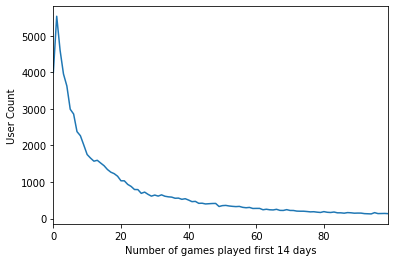

In [5]:
# This command makes plots appear in the notebook
%matplotlib inline

# Counting the number of players for each number of gamerounds 
plot_df = df.groupby('sum_gamerounds')['userid'].count()

# Plotting the distribution of players that played 0 to 100 game rounds
ax = plot_df.head(100).plot(x='sum_gamerounds', y = 'userid')
ax.set_xlabel("Number of games played first 14 days")
ax.set_ylabel("User Count")

The plot shows the following:
* some users downloaded the game and played 0 games
* some users downloaded the game and played some games
* some users downloaded the game and got hooked
The app developer wants the last of these three outcomes. 

A common mobile gaming metric is 1 day retention, the percentage of players that come back 1 day after the game is installed.

In [7]:
# The % of users that came back the day after they installed
print( "{0:.0%}".format(df['retention_1'].mean()))

45%


Roughly 45% of playrs comeback the day after installing the game. How does this differ between versions?

In [10]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

There is a difference but is the .6% difference significant? Even a small change in player retention can have a large impace. Using Bootstapping method we will resample ovr 500 iterations for both versions of the game. Analyzing the 1 day retentions from these samplings will determine how uncrtain the retention numbers are. 

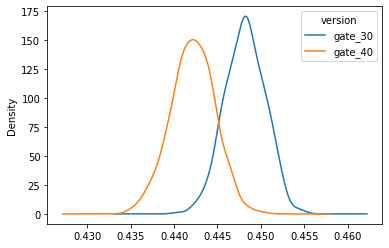

In [11]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_1d.head()
# A Kernel Density Estimate plot of the bootstrap distributions
# ... YOUR CODE FOR TASK 6 ...
boot_1d.plot.kde()

There does seem to be evidence of a difference in retention betweent he two gate placements. Lets focus ont he diffrence to determine how significant the difference is. 

Text(0.5, 0, 'Distribution of % Difference Gate 40 to Gate 30')

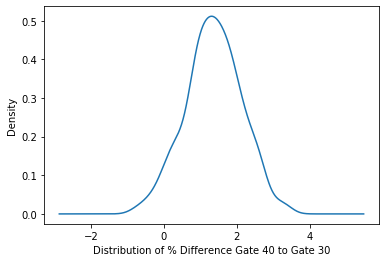

In [12]:
# Adding a column with the % difference between the two AB-groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40'])/ boot_1d['gate_40']
)*100
# Ploting the bootstrap % difference
ax = boot_1d['diff'].plot.kde()
# ... YOUR CODE FOR TASK 7 ...
ax.set_xlabel("Distribution of % Difference Gate 40 to Gate 30")

Most difference seem to fall between 1 & 2% of a differencein favor of gate 30. What is the probability of the difference being greater than 0?

In [13]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff']>0).mean()

# Pretty printing the probability
# ... YOUR CODE FOR TASK 8 ...
print( "{0:.0%}".format(prob))

96%


Only 4% of the samples did not have a difference in favor of gate 30. For now it seems as though when considering player retention gate 30 is perferable. However we still have to take into accoun what the retention levels are at the 7 day mark. That will be the topic of next week's blog. 